<img src="Logo_P6.PNG" height="400" width="400" >
<h1 style="color:blue; text-align:center; background-color:AliceBlue; font-size:300%; font-family:verdana; border:2px solid DodgerBlue"><br>ANALYSE DE LA VENTE EN LIGNE<br>
<h5 style="color:black; text-align:right">NGUYEN Huynh Thanh Qui<br>Septembre 2021<br></h5>
</h1>

In [1]:
# ! pip install pingouin

In [2]:
#Importation de bibliothèques
import pandas as pd
import  matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import colorama
from colorama import Fore, Back, Style
import pingouin as pg

In [3]:
#Lecture de données
transactions_web=pd.read_csv('transactions_web.csv')
customers=pd.read_csv('customers.csv')

<h2 style="color:black; text-align:center; background-color:AliceBlue; font-size:150%; font-family:Georgia; border:2px solid DodgerBlue"><br>I. Analyse des données du chiffre d'affaires<br></h2>

<h3 style="color:black; text-align:center;font-size:100%, font-family:Georgia; border:2px solid DodgerBlue"> <br>PARTIE 1 <br><br> Indicateurs, graphiques et l'évolution dans le temps du chiffre d'affaires<br></h3>

<ul style="font-family:Time"><b><br>Les indicateurs à analyser de la vente en ligne:<br></b>
    <li>nombre de commandes (nombes de sessions réalisées)</li>
    <li>nombres d'articles achetés</li>
    <li>montant du panier moyen</li>
    <li>chiffre d'affaires (CA) (par année et sur l'ensemble de la période)</li>
    <li>évolution du temps des indicateurs cités en-dessus</li>

<b><u><br> Remarque: <br></u></b>
Ici, on observe 2 périodes de la vente : <b>Mars 2021-Février 2022</b> et <b>Mars 2022-Février 2023</b>.
Afin de simplifier la nomenclature, elles seront appellées respectivement <b>2021</b> et <b>2022</b>; et <b>2021-2023</b> pour l'ensemble des 2 périodes
  <ul>

<h4 style="color:black; font-family:verdana"> <br>1. Les indicateurs principaux de la vente en ligne CA<br></h4>

<b style="font-family:Time"><b><br>a. <u>Période 03/2021-02/2022 ou 2021 <br></u></b>

In [4]:
#CA de Mars 2021 à Février 2022
trs_2021=transactions_web.loc[transactions_web["month"].between('2021-03-01', '2022-02-01')]
panier_moy_2021=round(trs_2021['price'].sum()/len(trs_2021.groupby(by='session_id')),2)

<b style="font-family:Time"><b><br>b. <u>Période 03/2022-02/2023 ou 2022 <br></u></b>

In [5]:
#CA de Mars 2022 à Février 2023
trs_2022=transactions_web.loc[transactions_web["month"].between('2022-03-01', '2023-02-01')]
panier_moy_2022=round(trs_2022['price'].sum()/len(trs_2022.groupby(by='session_id')),2)

<b style="font-family:Time"><b><br>c. <u>Tableau des indicateurs de la vente en ligne <br></u></b>

In [6]:
analyse_1 = pd.DataFrame({'2021': [trs_2021['price'].sum()
                            ,trs_2021['id_prod'].count()
                            ,len(trs_2021.groupby(by='session_id'))
                            ,panier_moy_2021]
                    ,'2022':[trs_2022['price'].sum()
                            ,trs_2022['id_prod'].count()
                            ,len(trs_2022.groupby(by='session_id'))
                            ,panier_moy_2022]
                    ,'2021-2022': [trs_2022['price'].sum() + trs_2021['price'].sum()
                                 ,trs_2022['id_prod'].count() + trs_2021['id_prod'].count()
                                 ,len(trs_2022.groupby(by='session_id'))+len(trs_2021.groupby(by='session_id'))
                                 ,(panier_moy_2021 + panier_moy_2022)/2
                                  ]
                    ,'Evolution(%)': [(trs_2022['price'].sum()-trs_2021['price'].sum())*100/trs_2021['price'].sum()
                                    ,(trs_2022['id_prod'].count()+trs_2021['id_prod'].count())/trs_2021['id_prod'].count()
                                    ,(len(trs_2022.groupby(by='session_id'))-len(trs_2021.groupby(by='session_id')))*100/len(trs_2021.groupby(by='session_id'))
                                    ,(panier_moy_2022-panier_moy_2021)*100/panier_moy_2021 
                                     ]
                   }
                    ,index = ['CA (euros)'
                              ,'Nombre de produits vendus'
                              ,'Nombre de sessions réalisées'
                              ,'Panier moyen (euros)'
                             ])
print(Fore.BLUE + Style.BRIGHT + f"Les indicateurs et l'évolution de la vente en ligne (03/2021-02/2023)")
display(analyse_1)

#Formater les chiffres décimales
pd.options.display.float_format = '{:.2f}'.format

Les indicateurs et l'évolution de la vente en ligne (03/2021-02/2023)


,2021,2022,2021-2022,Evolution(%)
CA (euros),5832945.24,6023375.77,11856321.01,3.264741
Nombre de produits vendus,337288.00,342044.00,679332.00,2.014101
Nombre de sessions réalisées,169194.00,173121.00,342315.00,2.321004
Panier moyen (euros),34.47,34.79,34.63,0.928343


<ul style="font-family:Time"><b> <u>En résumé</u> : </b>
      <li>La vente en ligne <i><b>progresse</b></i> entre <b><i>03/2021 et 02/2023</i></b></li>
      <li>Les indicateurs par année de la vente augmentent de <i><b>2 à 3%</b></i> entre <b><i>03/2021 et 02/2023</i></b></li>
      <li>Le montant du panier moyen est environ <b><i>34,63 euros</i></b> et augmente <b><i>0,9%</i></b> sur l'ensemble période</li>
  <ul>

<h4 style="color:black; font-family:verdana"> <br>2. Focus sur le chiffre d'affaires de la vente en ligne<br></h4>

In [7]:
#Préparation des informations de la vente en ligne 
nb_ventes=transactions_web.groupby(by='month')['id_prod'].count().to_frame().reset_index()
#display(nb_ventes.head())

CA_mois=transactions_web.groupby(by='month')['price'].sum().to_frame().reset_index()
#display(CA_mois.head())

#CA, nombre (nb) d'articles vendus/mois
CA_nb_vente=nb_ventes.merge(CA_mois, on='month', how='outer')
CA_nb_vente.rename(columns = {'id_prod': "Nombre d'articles vendus", 'price': 'CA (euros)'}, inplace = True) 
#display(CA_nb_vente.head())

#Groupement de nombre de sessions réalisées par mois
nb_sessions=transactions_web.groupby(by=['month','session_id']).count().reset_index()\
.groupby(by='month').count().reset_index()[['month','session_id']]

#print(Fore.BLUE + Style.BRIGHT + f"Nombre de sessions réalisées chaque mois")
#display(nb_sessions.shape)

#Jointure de nombre de sessions réalisées et nombre d'articles vendus par mois
nb_ventes=nb_sessions.merge(CA_nb_vente, on='month', how='outer')

#Renommer les colonnes
nb_ventes.rename(columns = {'session_id': "Nombre de sessions"}, inplace = True) 
print(Fore.BLUE + Style.BRIGHT + f"Résumé de la vente en ligne sur 24 mois")
display(nb_ventes)

Résumé de la vente en ligne sur 24 mois


,month,Nombre de sessions,Nombre d'articles vendus,CA (euros)
0,2021-03-01,14203,28610,482546.18
1,2021-04-01,13972,28457,476273.52
2,2021-05-01,14169,28293,493037.31
3,2021-06-01,13839,26857,484170.67
4,2021-07-01,13573,24742,482882.32
5,2021-08-01,13593,25659,482390.36
6,2021-09-01,14850,33326,507381.44
7,2021-10-01,11553,21606,320880.85
8,2021-11-01,14608,28321,516285.03
9,2021-12-01,15567,32464,525999.39


In [8]:
display(CA_nb_vente[CA_nb_vente["Nombre d'articles vendus"] == (CA_nb_vente["Nombre d'articles vendus"].min())])
display(CA_nb_vente[CA_nb_vente['CA (euros)'] == (CA_nb_vente['CA (euros)'].min())])
print(Fore.BLUE + Style.BRIGHT + f"CA et le nombre d'articles vendus sont minimals en 01/10/2021")

display(CA_nb_vente[CA_nb_vente['CA (euros)'] == (CA_nb_vente['CA (euros)'].max())])
print(Fore.BLUE + Style.BRIGHT + f"CA est maximal en 01/02/2022")

display(CA_nb_vente[CA_nb_vente["Nombre d'articles vendus"] == (CA_nb_vente["Nombre d'articles vendus"].max())])
print(Fore.BLUE + Style.BRIGHT + f"Le nombre d'articles vendus est maximal en 01/09/2021")

,month,Nombre d'articles vendus,CA (euros)
7,2021-10-01,21606,320880.85


,month,Nombre d'articles vendus,CA (euros)
7,2021-10-01,21606,320880.85


CA et le nombre d'articles vendus sont minimals en 01/10/2021


,month,Nombre d'articles vendus,CA (euros)
11,2022-02-01,29605,535700.53


CA est maximal en 01/02/2022


,month,Nombre d'articles vendus,CA (euros)
6,2021-09-01,33326,507381.44


Le nombre d'articles vendus est maximal en 01/09/2021


<b style="font-family:Time"><b><br>a. <u>La chute du chiffre d'affaires en 10/2021  </u><br></b>

Cette représentation de CA par jour et par catégorie nous montre qu'il existe une chute de CA en 10/2021, ce qui concerne la vente des produits de la catégorie 1.Plus précisément, la ligne rose (qui présente du CA de la catégorie 1) est penchée en 10/2021 car elle correspond seulement d'une liaison des 2 points ou il n'y a pas de transactions au milieu des 2 extrémités
Afin de faciliter l'observation de cette chute, je me concentre sur le CA généré par la catégorie 1 du mois 10/2021. Elle est présenté par le dataframe ci dessous : 


,price
new_date,
2021-10-01,7003.79
2021-10-28,6317.99
2021-10-29,6425.18
2021-10-30,6753.69
2021-10-31,7261.67


Le résultat de ce df montre que les livres de la catégorie 1 ne sont pas vendus de 02/10/2021 à 27/10/2021


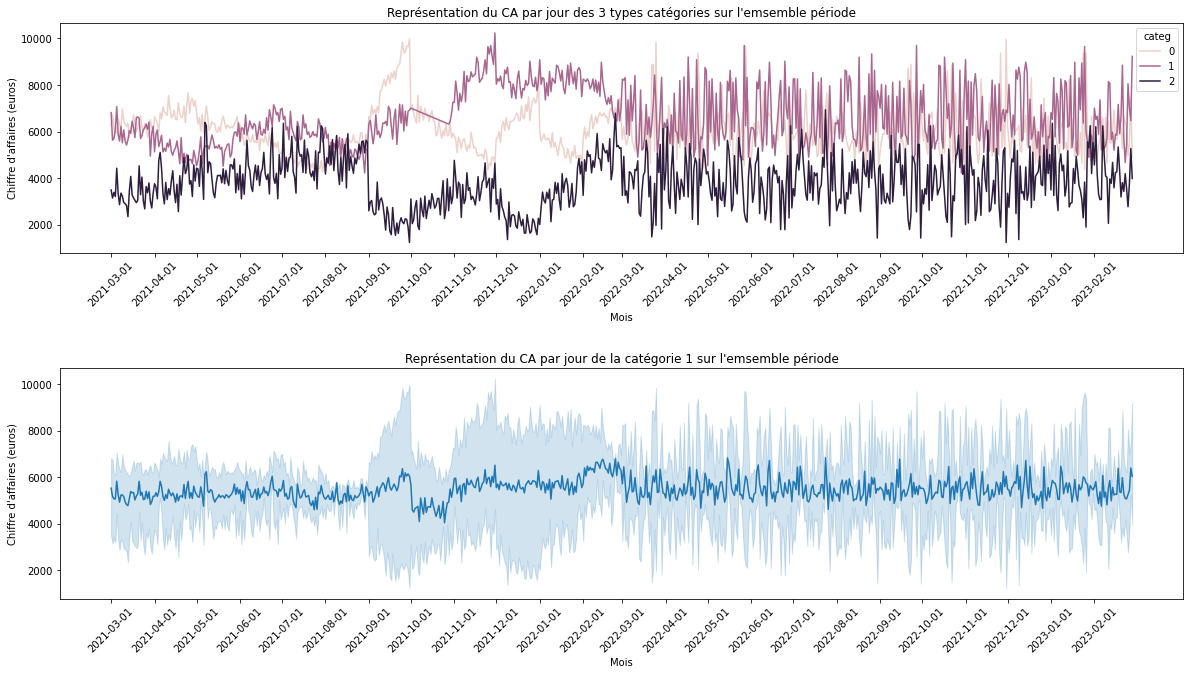

In [9]:
chute_CA = transactions_web.groupby(['new_date', 'categ']).sum()['price'].to_frame().reset_index()
#préparation du liste des mois pour axe x
mois=nb_ventes.month.to_list()
axes_x=np.array(mois)

#Paramétrer d'affichage des 2 diagrammes
figure = plt.figure(figsize = (30, 10))
plt.gcf().subplots_adjust(left = 0.2, bottom = 0.2,
                       right = 1.5, top = 1, 
                       wspace = 0.5, hspace = 0.5)

#Représentation du CA par jour des 3 types catégories 
axes = figure.add_subplot(2, 2, 1)
sns.lineplot(data=chute_CA, x="new_date", y="price", hue = 'categ').set(
   title="Représentation du CA par jour des 3 types catégories sur l'emsemble période",
    xlabel="Mois",
    ylabel="Chiffre d'affaires (euros)",
    xticks=axes_x)
plt.xticks(rotation=45)
print(Fore.BLUE + Style.BRIGHT + f"Cette représentation de CA par jour et par catégorie nous montre qu'il existe une chute de CA en 10/2021, \
ce qui concerne la vente des produits de la catégorie 1.\
Plus précisément, la ligne rose (qui présente du CA de la catégorie 1) est penchée en 10/2021 car elle correspond seulement d'une liaison des 2 points \
ou il n'y a pas de transactions au milieu des 2 extrémités")

#Représentation du CA par jour de la catégorie 1
axes = figure.add_subplot(2, 2, 3)
sns.lineplot(data=chute_CA, x="new_date", y="price").set(
   title="Représentation du CA par jour de la catégorie 1 sur l'emsemble période",
    xlabel="Mois",
    ylabel="Chiffre d'affaires (euros)",
    xticks=axes_x)
plt.xticks(rotation=45)
print(Fore.BLUE + Style.BRIGHT + f"Afin de faciliter l'observation de cette chute, je me concentre sur le CA généré par la catégorie 1 du mois 10/2021. \
Elle est présenté par le dataframe ci dessous : ")

chute_oct_2021=transactions_web[(transactions_web['new_date'] >= '2021-10-01') & (transactions_web['new_date'] <= '2021-10-31') & (transactions_web['categ'] == 1)]\
.groupby(by='new_date')['price'].sum()
display(chute_oct_2021.to_frame())

print(Fore.BLUE + Style.BRIGHT + f"Le résultat de ce df montre que les livres de la catégorie 1 ne sont pas vendus de 02/10/2021 à 27/10/2021")

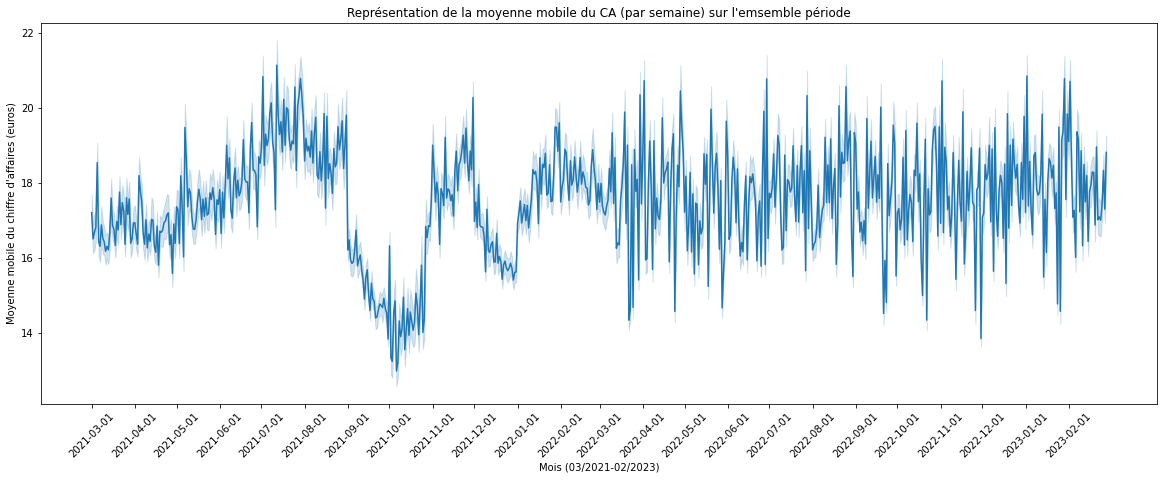

In [10]:
transactions_web_copy = transactions_web.copy()
transactions_web_copy['date'] = pd.to_datetime(transactions_web_copy.date)
transactions_web_copy = transactions_web_copy.sort_values(by = 'date')
transactions_web_copy['M_mobile'] = transactions_web_copy.price.rolling(7, min_periods = 1).mean()

# Moyenne mobile
figure = plt.figure(figsize = (20, 7))
sns.lineplot(data=transactions_web_copy, x="new_date", y="M_mobile").set(
   title="Représentation de la moyenne mobile du CA (par semaine) sur l'emsemble période",
    xlabel="Mois (03/2021-02/2023)",
    ylabel="Moyenne mobile du chiffre d'affaires (euros)",
    xticks=axes_x)
plt.xticks(rotation=45)
print()

In [11]:
#Prévision de CA en 2024
#total_CA_mois=transactions_web.groupby(by='month_date')['price'].sum().reset_index()
#display(total_CA_mois)

#Régression linéaire
#fit = np.polyfit(total_CA_mois.reset_index().index, total_CA_mois.reset_index().price, 1)
#poly = np.poly1d(fit) 
#CA_2024=pd.Series(poly(np.arange(24, 36, 1)).round(2))
#prevision_CA_2024=pd.DataFrame({'CA_prevision(euros)': np.array(CA_2024)})
#prevision_CA_2024['month_2024']=pd.date_range(start='2023-03-01',end='2024-03-01',freq='M', closed=None)
#prevision_CA_2024

<b style="font-family:Time"><b><br>b. <u>Evolution du CA et du nombre de ventes (nombre d'articles vendus) de 03/2021 à 02/2023 </u><br></b>

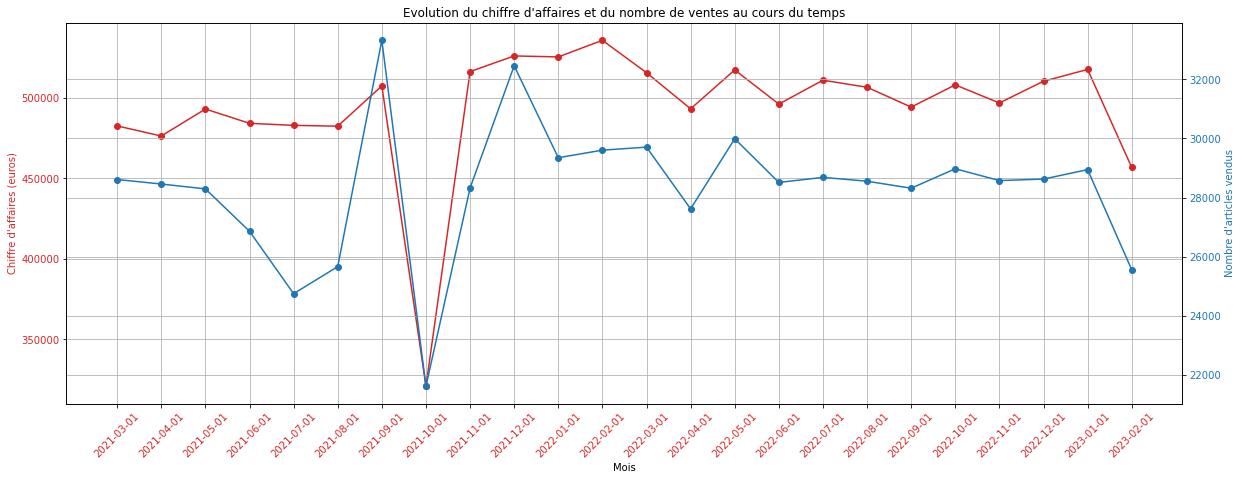

Evolution du chiffre d'affaires et du nombre d'articles vendus de 03/2021 à 02/2023


In [12]:
# Diagramme 1
# Tableau pour le tracé
x = nb_ventes['month']
y = nb_ventes['CA (euros)']
y2 = nb_ventes["Nombre d'articles vendus"]

# Affichage des données de l'axe principal
fig, ax1 = plt.subplots()
fig.set_size_inches(20, 7)
plt.xticks(rotation=45)

color = 'tab:red'
ax1.set_xlabel('Mois')
ax1.set_ylabel("Chiffre d'affaires (euros)", color=color)
ax1.plot(x, y,marker="o", color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelcolor=color)

ax1.grid(True)

# Affichage de l'axe secondaire
ax2 = ax1.twinx()  # Création d'un deuxième axe qui partage le même axe x

color = 'tab:blue'
ax2.set_ylabel("Nombre d'articles vendus", color=color)
ax2.plot(x, y2, marker="o", color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(True)


plt.title("Evolution du chiffre d'affaires et du nombre de ventes au cours du temps")
plt.show()
print(Fore.BLUE + Style.BRIGHT + f"Evolution du chiffre d'affaires et du nombre d'articles vendus de 03/2021 à 02/2023")


<ul style="font-family:Time"><b> <u>Observation de l'évolution du CA et du nombre d'articles vendus de 03/2021 à 02/2023 :</u> </b>
      <li>En générale, la vente en ligne est <b><i>stable</i></b> entre 03/2021 et 02/2023. Le CA et le nombre de produits vendus se varient en même sens, sauf la période de 07/2021 et la baisse de ces 2 indicateurs en 02/2023 (lié à la mise à jours des transactions)</li>
      <li>La chute de la vente en 10/2021 existe toujours, concernant l'absence de la vente des livres de la catégorie 1 </li>
  <ul>

<b style="font-family:Time"><b><br>c. <u>Evolution du nombre de ventes (nombre d'articles vendus et nombre de sessions de ventes) de 03/2021 à 02/2023 </u><br></b>

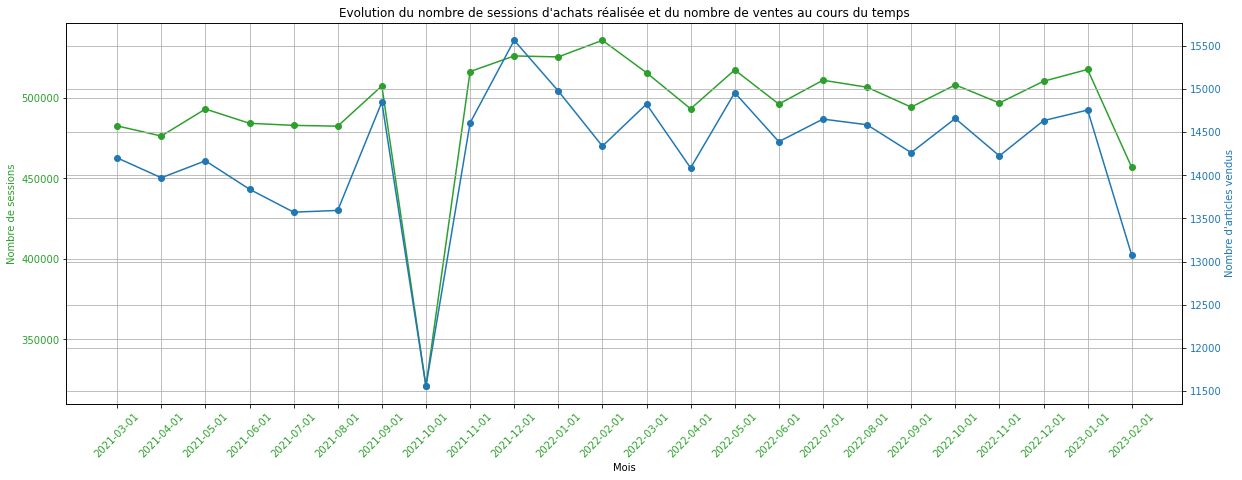

Evolution du nombre de sessions d'achats réalisée et du nombre d'articles vendus de 03/2021 à 02/2023


In [13]:
# Diagramme 2
# Tableau 2 pour le tracé
x=nb_ventes['month']
y=nb_ventes['CA (euros)']
y2 = nb_ventes["Nombre de sessions"]

# Affichage des données de l'axe principal
fig, ax3 = plt.subplots()
fig.set_size_inches(20, 7)
plt.xticks(rotation=45)

color = 'tab:green'
ax3.set_xlabel('Mois')
ax3.set_ylabel("Nombre de sessions", color=color)
ax3.plot(x, y,marker="o", color=color)
ax3.tick_params(axis='y', labelcolor=color)
ax3.tick_params(axis='x', labelcolor=color)
ax3.grid(True)

# Affichage de l'axe secondaire
ax4 = ax3.twinx()  # Création d'un deuxième axe qui partage le même axe x

color = 'tab:blue'
ax4.set_ylabel("Nombre d'articles vendus", color=color)
ax4.plot(x, y2, marker="o", color=color)
ax4.tick_params(axis='y', labelcolor=color)
ax4.grid(True)

plt.title("Evolution du nombre de sessions d'achats réalisée et du nombre de ventes au cours du temps")
plt.show()
print(Fore.BLUE + Style.BRIGHT + f"Evolution du nombre de sessions d'achats réalisée et du nombre d'articles vendus de 03/2021 à 02/2023")

<ul style="font-family:Time"><b><u> Observation de l'évolution du CA et du nombre de sessions réalisées de 03/2021 à 02/2023</u> : </b>
      <li>En générale, les 2 indicateurs sont <b><i>stables</i></b> entre 03/2021 et 02/2023 et ils sont similaires en terme de variation</li>
      <li>La chute de la vente en 10/2021 et la baisse de ces 2 indicateurs en 02/2023 existent toujours et similaires aux observations en haut</li>
  <ul>

Variation du CA au cours du temps de 03/2021 à 02/2023


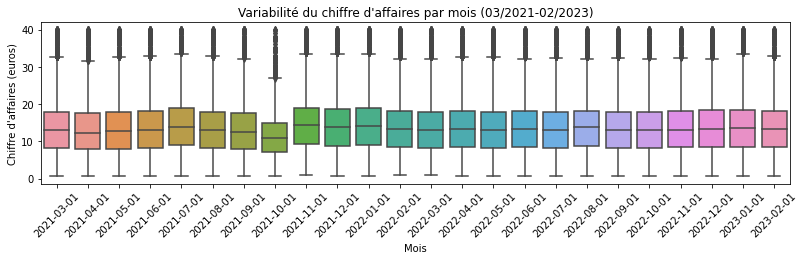

In [14]:
#Paramétrer d'affichage des 2 diagrammes
figure = plt.figure(figsize = (20, 7))
plt.gcf().subplots_adjust(left = 0.2, bottom = 0.2,
                       right = 1.5, top = 1, 
                       wspace = 0.5, hspace = 0.5)

#Courbe linéaire
#axes = figure.add_subplot(2, 2, 1)
#CA_moy_mois=transactions_web.groupby(by='month_date')['price'].mean().to_frame().reset_index()
#display(CA_moy_mois)
#sns.lineplot(data=CA_moy_mois, x="month_date", y="price")

#Boîte à moustaches
axes = figure.add_subplot(2, 2, 3)
sns.boxplot(x="month", y="price", data=transactions_web[transactions_web['price']<=40].sort_values(by='month')).set(
    title="Variabilité du chiffre d'affaires par mois (03/2021-02/2023)",
    xlabel="Mois",
    ylabel="Chiffre d'affaires (euros)")
plt.xticks(rotation=45)

print(Fore.BLUE + Style.BRIGHT + f"Variation du CA au cours du temps de 03/2021 à 02/2023")
#q25 = np.percentile(transactions_web['price'], 25)
#q75 = np.percentile(transactions_web['price'], 75)
#display(q25)
#display(q75)
##transactions_web['price'].mean()

<ul style="font-family:Time"><b> <u>Observation de la moyenne du panier de chaque mois de 03/2021 à 02/2023</u> : </b>
       <li>Le montant du panier moyen se trouve entre <b><i>15 euros et 19,5 euros</i></b> et <b><i>augmente légèrement</i></b> au cours du temps</li>
       <li>La représentation de la variabilité des paniers de chaque mois présente des valeurs (ou prix) qui sont inférieures à 40 euros. Les valeurs qui sont supérieures à 40 euros sont considérées comme des valeurs aberrantes (mais pas fausses). Ce tri est pour but de faciliter l'observation de ces variabilités </li>
      <li>Il n'y a pas de <b><i>variabilité dynamique</i></b> ou tous les mois ont une <b><i>médiane similaire</i></b> (sauf celle du 10/2021)</li>
      <li>La représentation en boîte à moustaches des <b><i>valeurs du panier</i></b> indique qu'elles se concentrent autours <b><i>de 8 et 19 euros</i></b> avec <b><i>une moyenne de 17,5 euros</i></b></li>
      <li>Les boîtes à moustaches et les médianes ont plus proche aux valeurs minimales ou <b><i>la plupart des paniers</i></b> ont le prix moins chère <b><i>(moins de 20 euros)</i></b></li>
      <li>Les produits qui ont un prix extrême suppérieur existent aussi et se répartissent sur une plage très large (présentés par les points et les valeurs aberrantes triées) </li>   
  <ul>

<h3 style="color:black; text-align:center; font-family:verdana; border:2px solid DodgerBlue"> <br>PARTIE 2 <br><br> Zoom sur les références<br></h3>

<ul style="font-family:Time">La deuxième partie concerne les analyses plus profondes sur les références des produits vendus, notamment sur la répartition des produits qui sont les plus/moins vendus ainsi ses catégories.
</ul>

<h4 style="color:black; font-family:verdana"> <br>1. Les produits apportent plus/moins de CA<br></h4>

Zoom sur les références des produits (les tops et les flops) entre 03/2021 à 02/2023


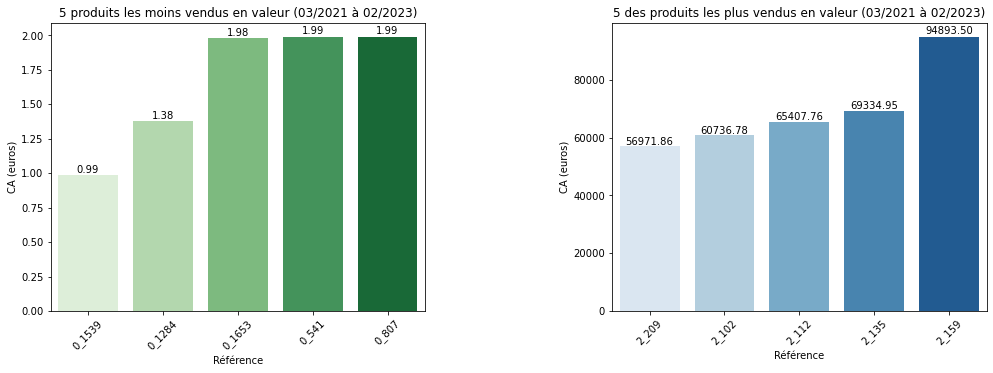

In [15]:
#Afficher 2 diagrammes (en horizontale)
figure = plt.figure(figsize = (10, 5))
plt.gcf().subplots_adjust(left = 0.2, bottom = 0.2,
                       right = 1.5, top = 1, 
                       wspace = 0.5, hspace = 2)

#Définir d'affichage les valeurs des bâtons
def show_values_on_bars(axes):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2 # position de la valeur
            _y = p.get_y() + p.get_height()*1.01 # position de la valeur
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axes, np.ndarray):
        for idx, ax in np.ndenumerate(axes):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axes)

#Diagramme en bâton 

#Le top 5 des références les moins vendues en valeur entre 03/2021 à 02/2023
produits_flops_CA=transactions_web.groupby(by='id_prod').sum()['price'].to_frame().sort_values(by='price').head(5).reset_index()
axes = figure.add_subplot(1, 2, 1)
sns.barplot(data=produits_flops_CA, y="price", x='id_prod', palette="Greens").set(
    title="5 produits les moins vendus en valeur (03/2021 à 02/2023)",
    xlabel="Référence",
    ylabel="CA (euros)")
plt.xticks(rotation=45)
show_values_on_bars(axes) #Afficher les valeurs

#Le top 5 des références les plus vendues en valeur entre 03/2021 à 02/2023
axes = figure.add_subplot(1, 2, 2)
produits_tops_CA=transactions_web.groupby(by='id_prod').sum()['price'].to_frame().sort_values(by='price').tail(5).reset_index()
sns.barplot(data=produits_tops_CA, y="price", x='id_prod',  palette="Blues").set(
    title="5 des produits les plus vendus en valeur (03/2021 à 02/2023)",
    xlabel="Référence",
    ylabel="CA (euros)")
plt.xticks(rotation=45)
print(Fore.BLUE + Style.BRIGHT + f"Zoom sur les références des produits (les tops et les flops) entre 03/2021 à 02/2023")
show_values_on_bars(axes)  #Afficher les valeurs

<ul style="font-family:Time"><b> <u>Observation</u> :</b>
      <li>Les produits qui apportent <b><i>plus de CA</i></b> sont ceux de <b><i>catégorie 2</i></b> et ils ont générés de 56971 euros à 94893 euros </li>
      <li>Au contraire, les produits qui apportent <b><i>moins de CA</i></b> sont ceux de <b><i>catégorie 0</i></b> donc le CA apporté se varie entre 0,99 euros et 1,99 euros</li>
  <ul>

<h4 style="color:black; font-family:verdana"> <br>2. Répartition du chiffre d'affaires apporté par les différentes catégories de produits<br></h4>

In [16]:
transactions_web.groupby(by='categ')['id_prod'].count().reset_index()

,categ,id_prod
0,0,415680
1,1,227169
2,2,36483


Description de la répartition du CA (euros) au sein de chaque catégorie de 03/2021 à 02/2023


price                                                          
        count     mean      std   min     25%     50%      75%      max
categ                                                                  
0     2293.00  1928.62  3381.64  0.99  174.90  492.82  1989.00 23452.65
1      737.00  6314.41  9733.86 14.24  575.82 2264.97  6855.20 54356.25
2      236.00 11780.83 15132.33 86.99 1534.48 4689.99 18462.00 94893.50

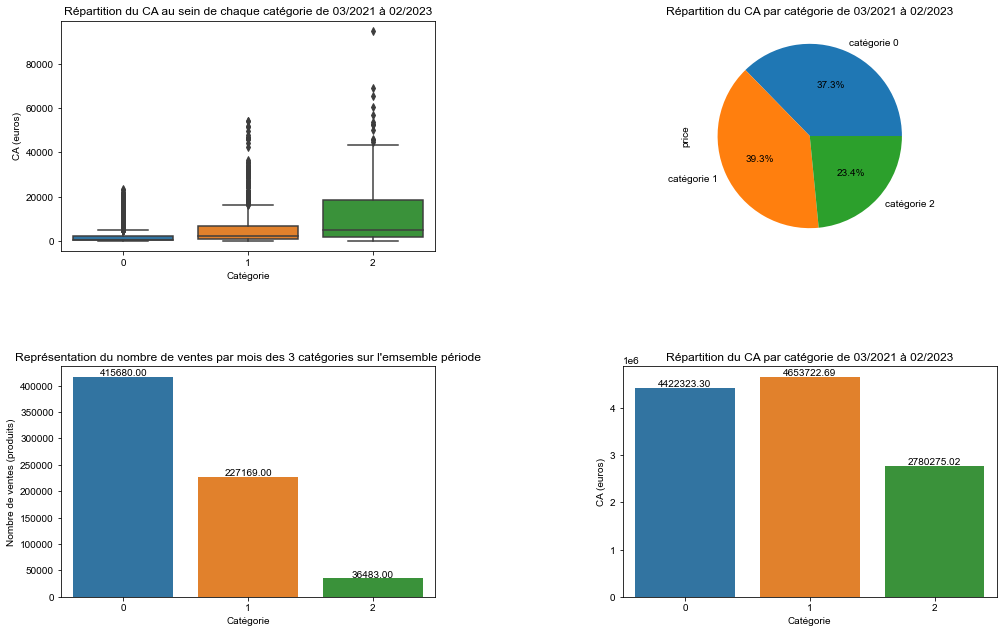

In [17]:
#Groupement de produits et de CA par catégories
repart_CA_categ=transactions_web.groupby(by=['id_prod','categ'])['price'].sum().reset_index()
repart_nb_ventes_categ=transactions_web.groupby(by='categ')['id_prod'].count().reset_index()

#Paramétrer la position et la taille des diagrammes
figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.2, bottom = 0.2,
                       right = 1.5, top = 1, 
                       wspace = 0.5, hspace = 0.5)

#Diagramme en bâton  du nombre de ventes par catégorie
axes = figure.add_subplot(2, 2, 3)
sns.barplot(data=repart_nb_ventes_categ, x="categ", y="id_prod").set(
   title="Représentation du nombre de ventes par mois des 3 catégories sur l'emsemble période",
    xlabel="Catégorie",
    ylabel="Nombre de ventes (produits)")
show_values_on_bars(axes)

#Boîte à moustaches CA des catégories de livres
axes = figure.add_subplot(2, 2, 1)
sns.boxplot(x="categ", y="price", data=repart_CA_categ).set(
    title='Répartition du CA au sein de chaque catégorie de 03/2021 à 02/2023',
    xlabel='Catégorie',
    ylabel='CA (euros)')

#Diagramme en bâton de CA/catégorie
CA_par_categ=repart_CA_categ.groupby(by='categ').sum().price.to_frame().reset_index()

axes = figure.add_subplot(2, 2, 4)
sns.barplot(x='categ',y='price', data=CA_par_categ).set(
    title='Répartition du CA par catégorie de 03/2021 à 02/2023',
    xlabel='Catégorie',
    ylabel="CA (euros)")
show_values_on_bars(axes)

#Diagramme circulaire de CA/catégorie
axes = figure.add_subplot(2, 2, 2)
repart_CA_categ.groupby(by='categ').sum().price.plot.pie(labels = ["catégorie 0", "catégorie 1", "catégorie 2"], normalize = True,autopct="%.1f%%")
plt.title("Répartition du CA par catégorie de 03/2021 à 02/2023")

sns.set_theme(style="whitegrid")
print(Fore.BLUE + Style.BRIGHT + f"Description de la répartition du CA (euros) au sein de chaque catégorie de 03/2021 à 02/2023")
display(repart_CA_categ.groupby(by='categ').describe())

<ul style="font-family:Time"><b><u> Observation</u> :</b>
      <li>Les chiffres d'affaire généré par chaque produit de la catégorie 2 est très varié (de 86.99 euros à 94893.50 euros) et ils sont bien supérieurs par rapport à 2 autres</li>
      <li>Cependant, les <b><i>nombres de produits vendus</i></b> ainsi que les <b><i>chiffres d'affaires</i></b> sont générés <b><i>les plus</i></b> par la vente des produits de <b><i>catégorie 0 et 1</i></b> (plus de 4,4M euros sur 2 ans)</li>
      <li>En générale, les livres de la <b><i>catégorie 0</i></b> sont les <b><i>plus achetés</i></b> (plus de 415k fois) tandis que les livres de la <b><i>catégorie 1</i></b> apportent le <b><i>plus de chiffre d'affaires</i></b></li>
  <ul>

Répartition du chiffre d'affaires par catégorie et par mois entre 03/2021 et 02/2023


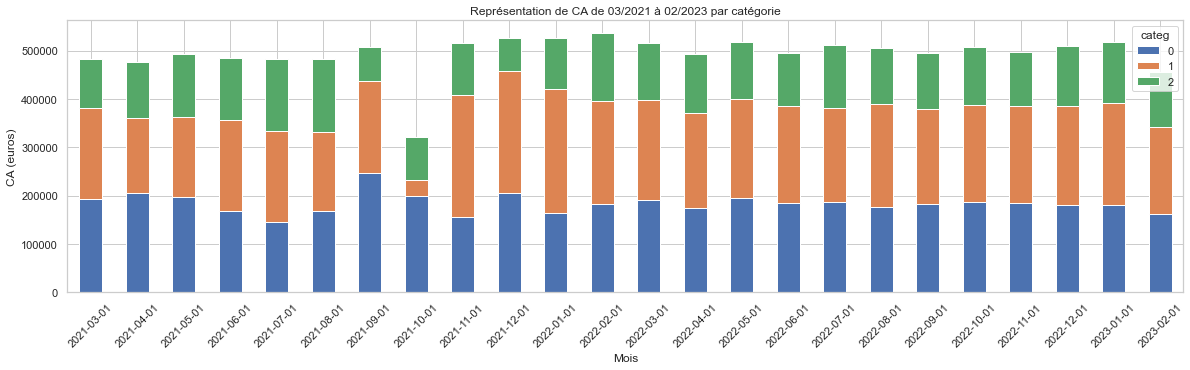

In [18]:
#Groupement de produits vendus en fonction du mois et de la catégorie
CA_categ=transactions_web.groupby(by=['month','categ'])['price'].sum().to_frame().reset_index()
#display(CA_categ)

#Pivoter le df 
CA_categ_pivot=CA_categ.pivot(index='month', columns='categ', values='price')
#display(CA_categ_pivot)
#Autre méthode pour pivoter df
#CA_categ.groupby(['month','categ'])['price'].sum().unstack('categ').plot(kind='bar', figsize=(20,7))

#Histogramme empilé

CA_categ_pivot.plot(kind='bar', stacked=True, figsize=(20,5))
plt.title("Représentation de CA de 03/2021 à 02/2023 par catégorie")
plt.xlabel("Mois")
plt.ylabel("CA (euros)")
plt.xticks(rotation=45)

print(Fore.BLUE + Style.BRIGHT + f"Répartition du chiffre d'affaires par catégorie et par mois entre 03/2021 et 02/2023")
#Autre méthode pour pivoter df
#CA_categ.groupby(['month','categ'])['price'].sum().unstack('categ').plot(kind='bar', figsize=(20,7))

<h3 style="color:black; text-align:center; font-family:verdana; border:2px solid DodgerBlue"> <br>PARTIE 3 <br><br> Profils de clients<br></h3>


In [19]:
CA_par_clients=transactions_web[['client_id','price','sex','birth','age']]
CA_par_clients.head()

,client_id,price,sex,birth,age
0,c_103,4.18,f,1986,36
1,c_8534,15.99,m,1988,34
2,c_6714,7.99,f,1968,54
3,c_6941,69.99,m,2000,22
4,c_4232,4.99,m,1980,42


<h4 style="color:black; font-family:verdana"> <br>1. Profils de clients<br></h4>

In [20]:
#Données des clients qui effectent des achats en ligne
customers['age']=2021-customers[['birth']]+1 #Rajouter la colonne 'age' dans le df 'customers'
CA_clients=CA_par_clients.groupby(by='client_id')['price'].sum().to_frame().reset_index().merge(customers, on='client_id', how='left')
CA_clients.head()

,client_id,price,sex,birth,age
0,c_1,558.18,m,1955,67
1,c_10,1353.60,m,1956,66
2,c_100,254.85,m,1992,30
3,c_1000,2261.89,f,1966,56
4,c_1001,1812.86,m,1982,40


Proportion de CA générée par des personnes ayant moins 54 ans : 81.78%
Proportion de top 3 CA en fonction d'âge


,CA (%)
age,
23,4.13
18,5.14
42,5.18


Représentation de chiffre d'affaires par d'âge des clients de 03/2021 à 02/2023


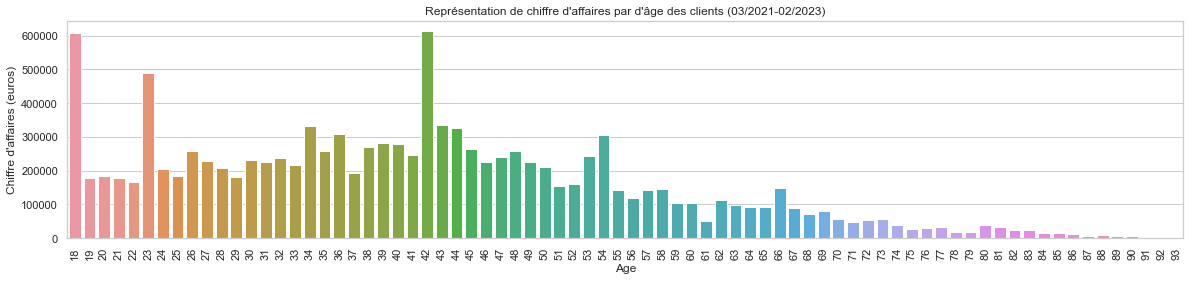

In [21]:
print(Fore.BLUE + Style.BRIGHT + f"Proportion de CA générée par des personnes ayant moins 54 ans : {round(CA_clients[CA_clients['age']<=54]['price'].sum()*100/CA_clients.price.sum(),2)}%")
print(Fore.BLUE + Style.BRIGHT + f"Proportion de top 3 CA en fonction d'âge")
display((CA_clients.groupby(by="age").sum()['price']*100/CA_clients.price.sum()).to_frame().sort_values(by='price').tail(3).rename(columns = {'price': 'CA (%)'}))

figure = plt.figure(figsize = (20, 4))
sns.barplot(x="age", y="price", data=((CA_clients.groupby(by='age').sum()['price'].reset_index()).sort_values(by='age'))).set(
    title="Représentation de chiffre d'affaires par d'âge des clients (03/2021-02/2023)",
    xlabel="Age",
    ylabel="Chiffre d'affaires (euros)")
plt.xticks(rotation=90)

print(Fore.BLUE + Style.BRIGHT + f"Représentation de chiffre d'affaires par d'âge des clients de 03/2021 à 02/2023")

<ul style="font-family:Time"><b> <u>Observation de la répartition de CA par âge</u> : </b>
      <li>Au total, la vente en ligne atteint un chiffre d'affaires <b><i>plus de 11,8 millions</i></b> entre 03/2021 à 02/2023</li>
      <li>Elle a plus de succès chez les personnes ayant <b><i>moins de 54 ans</i></b>, ceux qui génèrent <b><i>plus de 80% du chiffre d'affaires totales</i></b> de l'e-commerce </li>
      <li>Parmi cette population, <b><i>les chiffres d'affaires réalisés par les 42, 18 et 23 ans sont plus importants</i></b> (plus de 14% de CA total) </li>
  <ul>

Description de chiffre d'affaires entre femmes et hommes


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
f,4479.00,1308.56,2467.01,6.31,549.71,1030.27,1782.66,153669.30
m,4121.00,1454.81,7031.34,8.30,545.40,1026.64,1778.18,324033.35


Représentation en bar et en boîte à moustaches de chiffre d'affaires par genre des clients (pour les commandes inférieures de 100 euros)


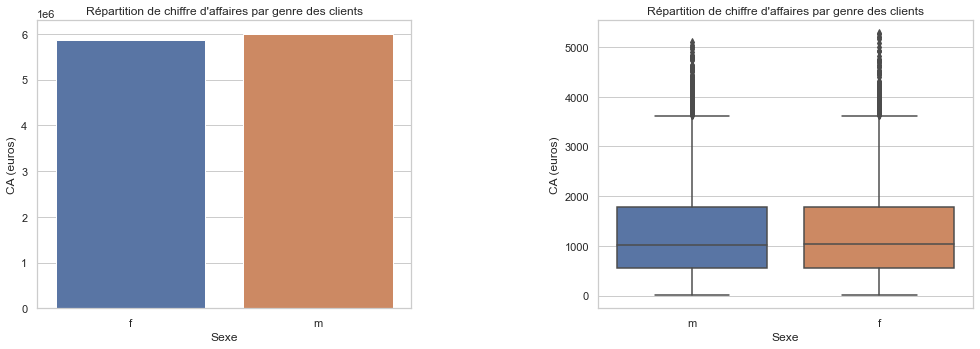

In [22]:
print(Fore.BLUE+Style.BRIGHT+f"Description de chiffre d'affaires entre femmes et hommes")
display(CA_clients.groupby(by = 'sex')['price'].describe())

figure = plt.figure(figsize = (10, 5))
plt.gcf().subplots_adjust(left = 0.2, bottom = 0.2,
                       right = 1.5, top = 1, 
                       wspace = 0.5, hspace = 0.5)

#Histogramme en bar
axes = figure.add_subplot(1, 2, 1)
CA_genre_bar=CA_clients.groupby(by = 'sex')['price'].sum().reset_index()#.plot(kind='bar', figsize=(2,3))
sns.barplot(x="sex", y="price", data=CA_genre_bar).set(
    title="Répartition de chiffre d'affaires par genre des clients",
    xlabel='Sexe',
    ylabel='CA (euros)')

#Boîte à moustaches
axes = figure.add_subplot(1, 2, 2)

#figure = plt.figure(figsize = (5,3))
sns.boxplot(x="sex", y="price", data=CA_clients[CA_clients['price']<=20000]).set(
    title="Répartition de chiffre d'affaires par genre des clients",
    xlabel='Sexe',
    ylabel='CA (euros)')

print(Fore.BLUE+Style.BRIGHT+ f"Représentation en bar et en boîte à moustaches de chiffre d'affaires par genre des clients (pour les commandes inférieures de 100 euros)")

#Données et descripttion de la boite de moustache
#CA_clients.sort_values(by='price')

<ul style="font-family:Time"><b><u> Observation de la répartition du nombre de clients féminins et masculins par âge</u> : </b>
      <li>La <b><i>répartition</i></b> de chiffre d'affaires est <b><i>similaire</i></b> chez les 2 sexes. Afin de faciliter la visualisation, je prends que les valeurs du chiffre d'affaires qui sont inférieurs à 20000 euros pour la présentation des boîtes à moustaches. La description détaillée de la répartition complète de CA est affichée sur le tableau en-dessus</li> 
      <li>Le diagramme à droite contient des boîtes asymétriques (qui se décalent vers le bas) et présentent la tendance de la somme de l'achat en ligne par client, donc environ <b><i>1000 euros pour 2 ans.<b><i></li>
  <ul>

<h4 style="color:black; font-family:verdana"> <br>2. Courbe de Lorenz de la répartition de chiffre d'affaires<br></h4>

Courbe de Lorenz de la répartition de chiffre d'affaires


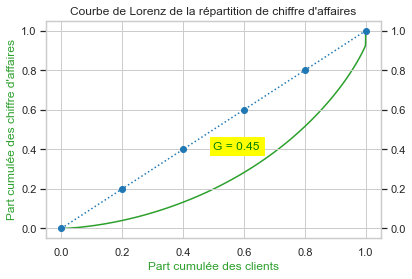

L'indice de Gini : 0.45


In [23]:
print(Fore.BLUE +Style.BRIGHT + f"Courbe de Lorenz de la répartition de chiffre d'affaires")

#Surface parfaite
perfect_x = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
perfect_y = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

#Courbe de Lorenz
CA_clients=transactions_web[['client_id','price','sex','birth','age']].groupby('client_id').sum()

CA=CA_clients['price'].values
n = len(CA_clients)
lorenz = np.cumsum(np.sort(CA)) / CA.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu,
# plus 1 segment supplémentaire d'ordonnée 0.
#Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
#figure = plt.figure(figsize = (10, 5))

# Affichage des données de courbe de Lorenz
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.plot(xaxis,lorenz,drawstyle='steps-post', color=color)
ax1.grid(True)
ax1.set_xlabel('Part cumulée des clients', color=color)
ax1.set_ylabel("Part cumulée des chiffre d'affaires", color=color)

# Affichage de la surface parfaite
ax2 = ax1.twinx()  # Création d'un deuxième axe qui partage le même axe x

color = 'tab:blue'
ax2.plot(perfect_x , perfect_y,color=color,fillstyle='full', marker='o', linestyle=':')

ax2.grid(True)

plt.annotate('G = 0.45', xy = (0.4, 0.5), xytext = (0.5, 0.4), color = 'green', backgroundcolor = 'yellow')
plt.title("Courbe de Lorenz de la répartition de chiffre d'affaires")
plt.show()

#L'indice de Gini
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0])\
#est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print(Fore.BLUE +Style.BRIGHT + f"L'indice de Gini : {round(gini,2)}")

<ul style="font-family:Time"><b> <u>Interprétation de la courbe de Lorenz présentant répartition de chiffre d'affaires</u> : </b>
      <li>La surface sous courbe (indice de Gini) présente <b><i>l'inégalité de la répartition de chiffre d'affaires</i></b> généré par des clients</li>
      <li>Dans ce cas, indice de Gini est égale à 0,45 et loin d'être 0 donc, il existe une inégalité ou <b><i>une partie de clients contribuent plus de CA</i></b> par rapport aux autres </li>
  <ul>

<h2 style="color:black; text-align:center; background-color:AliceBlue; font-size:150%; font-family:verdana; border:2px solid DodgerBlue"><br>3. Analyse des comportements clients<br></h2>

<h3 style="color:black; text-align:center; font-family:verdana; border:2px solid DodgerBlue"> <br>PARTIE 1 <br><br> Lien entre le genre du client et les catégories des livres achetés<br></h3>

Tableau de contingence coloré


categ,0,1,2,Total
sex,,,,
f,206220,114899,17283,338402
m,209460,112270,19200,340930
Total,415680,227169,36483,679332


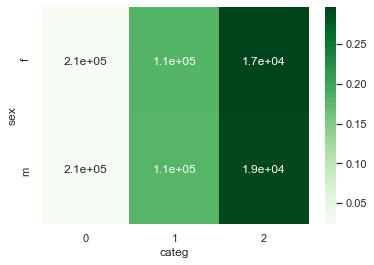

In [24]:
print(Fore.BLUE+ Style.BRIGHT + f"Tableau de contingence coloré")
genre_categ=transactions_web.groupby(by=['categ', 'sex'])['client_id'].count().reset_index().pivot_table(index='sex', columns='categ', values='client_id',aggfunc=np.sum, margins=True, margins_name="Total")
display(genre_categ)

tx = genre_categ.loc[:,["Total"]]
ty = genre_categ.loc[["Total"],:]
n = len(transactions_web)
indep = tx.dot(ty) / n

c = genre_categ.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1],cmap='Greens')
plt.show()

<ul style="font-family:Time"><b> <u>Analyse du genre de clients et des catégories de livres achetés (2 variables qualitatives) avec le test Chi-2 d'indépendance</u></b><br><br>
    <li>Le tableau de convergence coloré ci-dessus présente l'influence de genre des clients sur les catégories de livres achetées. Plus la couleur est foncée, plus l'influence est probablement forte. Cela signifie qu'il est probablement que la vente des livres de la <b><i>catégorie 2</i></b> est <b><i>dépends au genre de clients</i></b>. La vente des 2 autres catégories est moins influencée par le genre de clients, spécialement des produits de la catégorie 0</li><br>
    <li>L'utilisation du <b><i>test Chi-2</i></b> permet d'affirmer les observations générales citées en-dessus. La question posée dans ce contexte est :<b><i> "Les catégories de livres achetés sont différentes entre les femmes et les hommes ?" </i></b><br></li><br>
    <li>Si la réponse est non ou <b><i>s'il n'y a pas la différence de l'achat chez le genre de clients, on obtient une validation sur l'hypothèse nulle (H0)</i></b>. Au contraire, on a une contre hypothèse appellé <b><i>H1 ou il existe un lien entre les 2 variables étudiées (genre et catégories)</i></b></li><br>
    <li>Plus précisément, si la H0 est vrai, on a une équiprobabilité ou le nombre d'articles achetées (en théorique) calculé pour chaque case à partir des marges (la ligne et la colonne de totaux) de catégories et de sexe ne sont pas différents avec le tableau de contingence en haut (avec un risque de se tromper définit alpha (ici, j'utilise alpha = 0,05 ou 5%))</li>
  <ul>

In [25]:
print(Fore.BLUE+ Style.BRIGHT + f"Tableau des valeurs théoriques; tableau des valeurs observées et le résultat du test Chi-2")
pg.chi2_independence(transactions_web, x='sex', y='categ', correction=True)

Tableau des valeurs théoriques; tableau des valeurs observées et le résultat du test Chi-2


(categ         0         1        2
 sex                               
 f     207066.56 113161.82 18173.62
 m     208613.44 114007.18 18309.38,
 categ       0       1      2
 sex                         
 f      206220  114899  17283
 m      209460  112270  19200,
                  test  lambda   chi2  dof  pval  cramer  power
 0             pearson    1.00 147.00 2.00  0.00    0.01   1.00
 1        cressie-read    0.67 147.01 2.00  0.00    0.01   1.00
 2      log-likelihood    0.00 147.05 2.00  0.00    0.01   1.00
 3       freeman-tukey   -0.50 147.08 2.00  0.00    0.01   1.00
 4  mod-log-likelihood   -1.00 147.13 2.00  0.00    0.01   1.00
 5              neyman   -2.00 147.25 2.00  0.00    0.01   1.00)

<ul style="font-family:Time"><b><u> Analyse le genre de clients et les catégories de livres achetés (2 variables qualitatives) avec le le test Chi-2 d'indépendance</u></b>
    <ul style="font-family:Time"><br>
    <li>Le résultat du test Chi-2 est égal à <b>147</b>. Ici je choisi un seuil alpha de rejet H0 à 5% et 95% de chances (sous H0) que la variable de test prenne sa valeur. Autrement dit, si l'hypothèse de l'équiprobabilité est rejettée, on a une probabilité de se tromper à 5%. La valeur du test est suppérieur à <b>5,991</b> (avec alpha = 0,05 et un degré de liberté dof = 2), donc on peut <b><i>rejetter H0</i></b> </li>
    <li><b>pvalue</b> est proche 0,00 (< alpha = 0,05%) donc le rejet H0 est peu de risque d'être trompé.</li>
    <li><b><i>En résumé, il existe un lien entre le genre de clients et les catégories de livres achetés et les observations générales en-dessus sont raisonables</i></b></li>
  <ul>

<h3 style="color:black; text-align:center; font-family:verdana; border:2px solid DodgerBlue"> <br>PARTIE 2 <br><br> Lien entre l'âge des clients et l'achat en ligne<br></h3>

<h4 style="color:black; font-family:verdana"> <br>1. L'âge des clients et le montant total des achats<br></h4>

,age,montant (euros)
0,18,609013.69
1,19,178195.78
2,20,184212.54
3,21,178497.70
4,22,165031.44


Représentation du lien entre d'âge des clients et le montant total des achats
Le coefficient r est égal à -0,78 et signifie une corrélation forte et négative 


,montant (euros)
age,-0.78


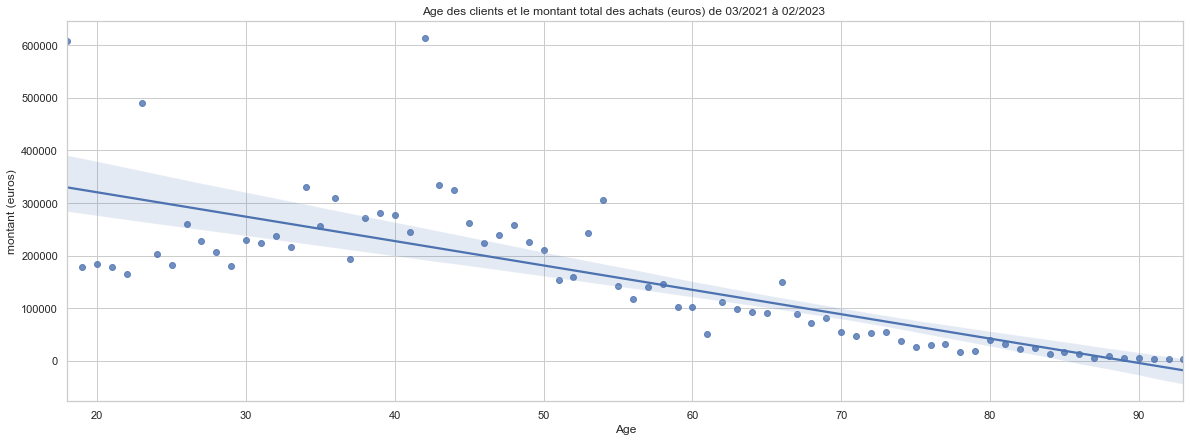

In [26]:
age_client = transactions_web.groupby(by='age')['price'].sum().to_frame()
age_client.rename(columns={'price':'montant (euros)'}, inplace=True) 
age_client.reset_index(inplace=True)
display(age_client.head())
print(Fore.BLUE+ Style.BRIGHT + f"Représentation du lien entre d'âge des clients et le montant total des achats")
        
#Répartition et relation du nombre de clients en fonction de leur âge
figure = plt.figure(figsize = (20, 7))
sns.regplot(x='age', y='montant (euros)',data=age_client, fit_reg=True).set(
    title='Age des clients et le montant total des achats (euros) de 03/2021 à 02/2023 ',
    xlabel='Age',
    ylabel='montant (euros)')
print(Fore.BLUE+ Style.BRIGHT + f"Le coefficient r est égal à -0,78 et signifie une corrélation forte et négative ")
age_client.corr().iloc[:1,[1]]

<ul style="font-family:Time"><b><u> Observation du lien entre d'âge des clients et le montant total des achats</u> : </b><br>
      Il existe une corrélation entre les 2 indicateurs. Plus les clients sont âgés, plus le montant total du panier est faible
  <ul>

<h4 style="color:black; font-family:verdana"> <br>2. L'âge des clients et la fréquence d’achat<br></h4>

,nombre d'achats,fréquence d'achats par mois
age,,
18,8594,358.08
19,2567,106.96
20,2604,108.50
21,2431,101.29
22,2421,100.88


Représentation de la fréquence d'achats en fonction de l'âge
Le coefficient r est égal à -0,55 et signifie une corrélation forte et négative 


,fréquence d'achats par mois
age,-0.55


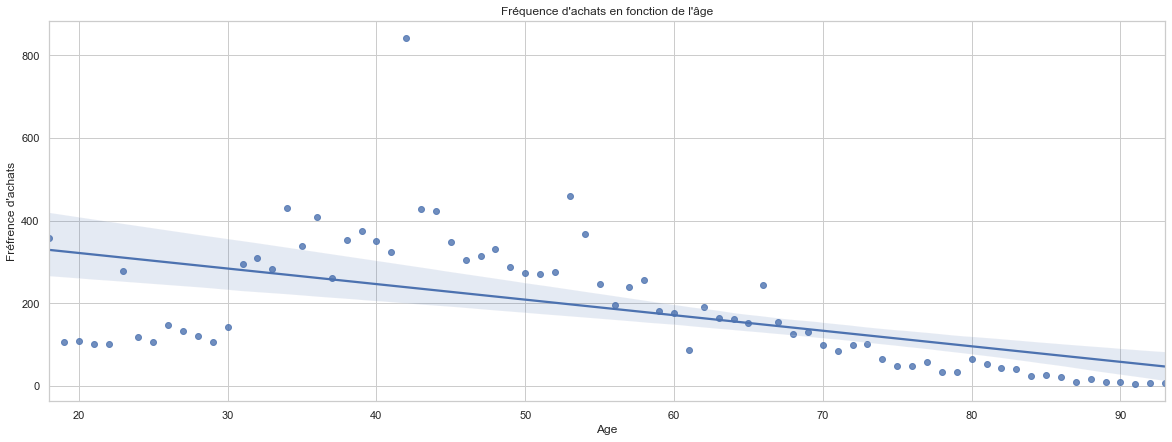

In [27]:
#Fréquence d'achats et l'âge des clients
nb_achats=transactions_web.groupby(by=['session_id','age'])['session_id'].count().to_frame()
nb_achats.rename(columns={"session_id":"nombre d'achats"}, inplace=True)
nb_achats_age=nb_achats.reset_index().groupby(by='age').count()["nombre d'achats"].to_frame()
nb_achats_age["fréquence d'achats par mois"]=nb_achats_age["nombre d'achats"]/24
display(nb_achats_age.head())
print(Fore.BLUE+ Style.BRIGHT + f"Représentation de la fréquence d'achats en fonction de l'âge")

#Lien entre l'âge des clients et la fréquence d'achats
figure = plt.figure(figsize = (20, 7))
sns.regplot(x='age', y="fréquence d'achats par mois",data=nb_achats_age.reset_index(), fit_reg=True).set(
    title="Fréquence d'achats en fonction de l'âge",
    xlabel='Age',
    ylabel="Fréfrence d'achats")
print(Fore.BLUE + Style.BRIGHT + f"Le coefficient r est égal à -0,55 et signifie une corrélation forte et négative ")
nb_achats_age.reset_index().corr().iloc[:1,[2]] #coefficient de Pearson

#nb_achats_age.reset_index().corr(method='spearman')

<ul style="font-family:Time"><b><u> Observation du lien entre l'âge des clients et la fréquence d'achat</u> : </b><br>
      Il existe une corrélation négative entre les 2 indicateurs (|r|>0,5). Plus les clients sont âgés, plus la fréquence d'achat est moins
  <ul>

<h4 style="color:black; font-family:verdana"> <br>3. L'âge des clients et la taille du panier moyen<br></h4>

,age,session_id,id_prod,taille du panier moyen
0,18,8594,15149,1.76
1,19,2567,4371,1.70
2,20,2604,4587,1.76
3,21,2431,4252,1.75
4,22,2421,4415,1.82


La taille du panier moyen en fonction de l'âge
Le coefficient r est égal à -0.57 et signifie une corrélation forte et négative


,taille du panier moyen
age,-0.57


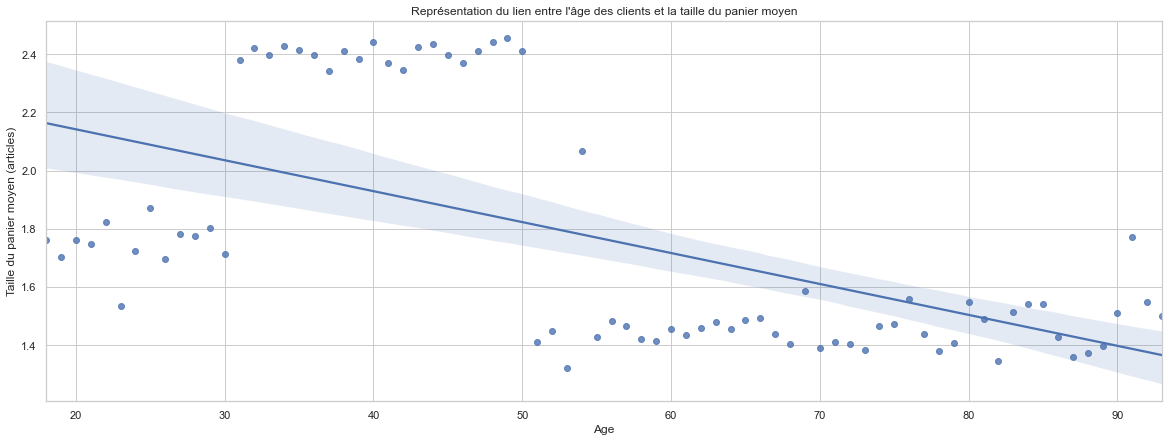

In [28]:
#Taille du panier moyen/âge (nombre d'articles/session/âge)
nb_paniers=transactions_web.groupby(by=['age','session_id']).count()\
            .reset_index().groupby(by='age')['session_id'].count().reset_index()

nb_articles=transactions_web.groupby(by='age')['id_prod'].count().reset_index()
#display(panier_moyen.head())
#display(nb_articles.head())

taille_panier_moyen=nb_paniers.merge(nb_articles, on ='age')
taille_panier_moyen["taille du panier moyen"]=taille_panier_moyen['id_prod']/taille_panier_moyen['session_id']
display(taille_panier_moyen.head())
#display(taille_panier_moyen.shape)
print(Fore.BLUE+ Style.BRIGHT + f"La taille du panier moyen en fonction de l'âge")

#Diagramme
figure = plt.figure(figsize = (20, 7))
sns.regplot(x="age", y="taille du panier moyen",data=taille_panier_moyen.sort_values(by='age')).set(
    title="Représentation du lien entre l'âge des clients et la taille du panier moyen",
    xlabel="Age",
    ylabel="Taille du panier moyen (articles)")
#plt.xticks(rotation=90)
#print(Fore.BLUE+ Style.BRIGHT + f"Représentation du lien entre l'âge des clients et la taille du panier moyen")
#transactions_web.groupby(by='age')['price'].mean().to_frame().describe()
print(Fore.BLUE+ Style.BRIGHT + f"Le coefficient r est égal à -0.57 et signifie une corrélation forte et négative") 
taille_panier_moyen.corr().iloc[:1,[3]]

<ul style="font-family:Time"><b><u> Observation du lien entre l'âge des clients et la taille du panier moyen</u> : </b><br>
    <li>Le montant dépensé par l'âge des clients se varie entre 12,9 euros et 47,8 euros</li>
    <li>Les clients ayant moins de 30-50 ans ont les tailles du panier moyen les plus importants. Les observations de la taille du panier moyen sont similaires aux 2 autres (CA total/âge et fréquence d'achats/âge), plus l'âge augmente, plus la taille du panier moyen est diminuée (corrélation négative).</li>
  <ul>

<h4 style="color:black; font-family:verdana"> <br>4. L'âge des clients et les catégories des livres achetés<br></h4>

<ul style="font-family:Time"><b><u> Analyse de l'âge des clients et des catégories des livres achetés avec le test ANOVA  </b></u><br><br>
        <li>ANOVA est un test paramétrique, donc, je suppose que la distribution des 2 variables suit le loi normal grâce à la théorème de la limite centrale</li>
     <li>Ce test permet de comparer le nombre de livres vendus par âge de clients (variable quantitative ) et la catégorie des livres achetés (variable qualitative à 3 niveaux). Les 2 hypothèses testées sont <b>H0</b> et <b>H1</b> avec :</li><br>
    <b>H0 : il n’y a pas la différence entre les moyennes des livres vendus (par âge de clients) pour chaque catégorie</b><br>
    <b>H1 : au moins une des moyennes est différente aux autres</b><br><br>
    <li>Je choisi le niveau de confiance de 95% (sous H0) avec un risque <b>α=5%</b>(erreur de premier espèce)</li>
    <li>Si <b>F > fν1,ν2,α</b> : rejet de H0 au risque α ou <b>l'âge de clients influence aux catégories des livres vendus</b> </li>
    <li>Si <b>F < fν1,ν2,α</b> : H0 n’est pas rejetée, <b>il n'y a pas de liaison entre les 2 variables analysées</b> </li>
  <ul>

In [29]:
comparaison_ANOVA=transactions_web[['age','categ', 'id_prod']].groupby(by=['categ', 'age']).count()['id_prod'].to_frame()
display(comparaison_ANOVA.head())
aov = pg.anova(data=comparaison_ANOVA.reset_index(), dv='id_prod', between='categ', detailed=True)
print(Fore.BLUE+ Style.BRIGHT + f"Dans ce cas, F=25,61 > f=3,88 (avec ν1=2, ν2=225, α=5%), donc, on rejet H0 ou au moins une moyenne du nombre de livres vendus par âge et par catégorie est différente \
aux autres. Plus précisément l'âge des clients influence le nombre de livres vendus") 
aov

id_prod
categ age         
0     18      3418
      19       909
      20      1019
      21       974
      22      1116

Dans ce cas, F=25,61 > f=3,88 (avec ν1=2, ν2=225, α=5%), donc, on rejet H0 ou au moins une moyenne du nombre de livres vendus par âge et par catégorie est différente aux autres. Plus précisément l'âge des clients influence le nombre de livres vendus


,Source,SS,DF,MS,F,p-unc,np2
0,categ,945999616.34,2,472999808.17,25.61,0.00,0.19
1,Within,4155658756.50,225,18469594.47,NaN,NaN,NaN


categ,0,1,2
age,,,
18,3418,5719,6012
19,909,1678,1784
20,1019,1723,1845
21,974,1550,1728
22,1116,1628,1671


(76, 3)

Représentation du lien entre l'âge des clients et les catégories des livres achetés entre 03/2021 et 02/2023


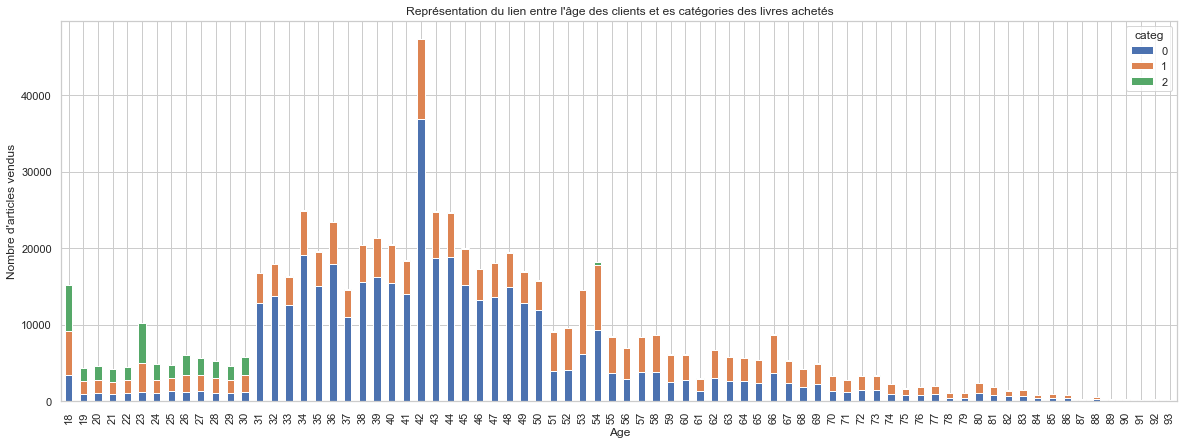

In [30]:
#Catégories des livres achetés/age
age_categ=transactions_web[['client_id','age','sex', 'categ']].groupby(by=['categ', 'age']).count().reset_index()
age_categ_pivot=age_categ.pivot_table(index='age', columns='categ', values='client_id')#,aggfunc=np.sum, margins=True, margins_name="Total")

#age_categ_pivot=age_categ.pivot_table(index='age', columns='categ', values='client_id', aggfunc=len,margins=True,margins_name="Total")
#cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
display(age_categ_pivot.head())
display(age_categ_pivot.shape)

#Histogramme empilé
age_categ_pivot.plot(kind='bar', stacked=True, figsize=(20,7))
plt.title("Représentation du lien entre l'âge des clients et es catégories des livres achetés")
plt.xlabel("Age")
plt.ylabel("Nombre d'articles vendus")

print(Fore.BLUE + Style.BRIGHT + f"Représentation du lien entre l'âge des clients et les catégories des livres achetés entre 03/2021 et 02/2023")
#age_categ_pivot.describe()

<ul style="font-family:Time"><b><u> Résumé sur le lien entre l'âge des clients et les catégories des livres achetés entre 03/2021 et 02/2023<u> : </b><br>
    <li>Les catégories de livres achetées sont variées en fonction de l'âge des clients. Plus précisément, seulement (ou presque) les clients qui ayant moins de 30 ans achetent des livres de la catégorie 2 où ses prix sont plus chers</li>
    <li>En revanche, la quantité vendue de ceux de la catégorie 2 est négligable chez les autres âges. Les clients de 31 ans à 55 ans sont plus intéressés par des livres de la catégorie 0. Au contraire, le reste des clients (>55 ans) achètent en quantité égale (ou presque égale) des livres de catégorie 0 et 1 </li>
    <li>En résumé, cette répatition du nombre de livres vendus par catégorie et par âge explique la tendance d'achats des clients en fonction de leurs âges ainsi que le lien entre l'âge des clients et le montant du panier moyen observé en dessus</li>
  <ul>

<h3 style="color:black; text-align:center; font-family:verdana; border:2px solid DodgerBlue"> <br>PARTIE 2 <br><br> Cas particulier : Relation entre deux ouvrages (ref: 2_159 et 0_525)<br></h3>

<ul style="font-family:Time">Dans le contexte de cette analyse, j'utilise la probabilité conditionnelle en suivant l'équatio suivante:
<img src="propabilite conditionnelle.PNG" height="150" width="150" >
    avec évenement <b>A</b>: probabilité qu’un client achète la référence <b>0_525</b><br>
    et évenement <b>B</b> : probabilité qu’un client achète la référence <b>2_159 (livre qui génère le plus de CA)</b>
<ul>

In [31]:
#transactions_web[transactions_web['id_prod']=='2_159'].price
#transactions_web[transactions_web['id_prod']=='0_525'].price

In [32]:
total_sessions=transactions_web.groupby(by='client_id').count()
nb_sessions_2_159=transactions_web[transactions_web['id_prod'].isin({'2_159'})].groupby(by='client_id').count()
#display(nb_sessions_2_159.sort_values(by='id_prod').tail())
B=len(nb_sessions_2_159)*100/len(total_sessions)

print(Fore.BLUE + Style.BRIGHT + f"Probabilité qu’un client achète la référence 2_159 : {round(B,2)}%")

nb_sessions_2_prod=transactions_web[transactions_web['id_prod'].isin({'2_159','0_525'})].groupby(by='client_id').count()
# nb_sessions_2_prod[nb_sessions_2_prod['id_prod']==2]
A_et_B=len(nb_sessions_2_prod[nb_sessions_2_prod['id_prod']==2])*100/len(total_sessions)
print(Fore.BLUE + Style.BRIGHT + f"Probabilité qu’un client achète les références 2_159 et 0_525 en même temps : {round(A_et_B,2)}%")

result=A_et_B*100/B
print(Fore.BLUE + Style.BRIGHT + f"Probabilité qu’un client achète les références 0_525 sachant il a acheté la référence 2_159 : {round(result,2)}%")

Probabilité qu’un client achète la référence 2_159 : 6.16%
Probabilité qu’un client achète les références 2_159 et 0_525 en même temps : 5.2%
Probabilité qu’un client achète les références 0_525 sachant il a acheté la référence 2_159 : 84.34%
